In [44]:
%%js
require.config({
  paths: {
    d3: "http://d3js.org/d3.v4.min"
  }
});
require(["d3"], function(d3) {
  element.append("h1").text("Successfully loaded D3 version " + d3.version);
});

<IPython.core.display.Javascript object>

In [35]:
%%js
element.append(Date());
define('e2',(t1)=>{
    const t1_f = (el)=>{el.append('t1234')}
    return {t1:t1_f}  
})
require(['e2'],(t1)=>{
    console.log(t1.t1);
    t1.t1(element);
})

<IPython.core.display.Javascript object>

In [ ]:
## Metropolish

In [1]:
%%js
console.log(require.s.contexts._.defined)

<IPython.core.display.Javascript object>

In [93]:
%%js


UsageError: %%js is a cell magic, but the cell body is empty.


## Metropolis–Hastings sampling
1. Init $x^{(0)} \leftarrow q(x)$ 
2. __For__ $i = 1$ to $L$ __Do__   
2.1. __Propose__ $x^{candidate} \leftarrow q(x^{(i)}|x^{i-1})$  
2.2. __Acceptance probability__:  $\alpha(x^{candidate}|x^{(i-1)}) = min(1,\frac{p(x^{(i-1)}|x^{candidate})\pi(x^{candidate})}{q(x^{candidate}|x^{(i-1)})\pi(x^{i-1})})$  
2.3. $u = Uniform(0,1)$  
2.4. __If__ $u \le \alpha$ __Then__  
2.4.1 __Accept proposal__: $x^{(i)} \leftarrow x^{candidate}$  
2.5. __Else:__  
2.5.1. __Reject proposal__: $x^{(i)} \leftarrow x^{(i-1)}$

In [41]:
%%js
const del_module = (modulename)=>{
    var context = require.s.contexts['_'];
    delete context.defined[moduleName];
    delete context.specified[moduleName];
    delete context.loaded[moduleName];    
}
define('f1',()=>{
    return {'f1':()=>{return 'sdfdf2'}}
})
define('f2',()=>{
    return {'f2':()=>{return 'sdfdf2'}}
})
require(['f1','f2'],(f1,f2)=>{
    element.append(f1.f1());
    element.append(`<br>`);
    element.append(f2.f1());
})

<IPython.core.display.Javascript object>

In [8]:
%%html
<svg id="distribution" width></svg>
<script>
require(['d3','jquery'],function(d3,$){
    const svg = d3.select("svg"),
        margin = {top: 20, right: 80, bottom: 30, left: 50},
        width = svg.attr("width") - margin.left - margin.right,
        height = svg.attr("height") - margin.top - margin.bottom,
        g = svg.append("g").attr("transform", "translate(" + margin.left + "," + margin.top + ")");
})
</script>

## HMC algorithm

__Function__ $leapfrog(\theta,r,\epsilon)$   
  - Set $\hat{\theta} \leftarrow + (\epsilon/2)\nabla(\cal L)$   
  - Set $\hat{}$  
  - Set $\hat{}$   
  
__EndFunction__

1. given $\theta^0$, $\epsilon$, $\cal L$, $\mathbb{L}$, M  
2. __for__ m = 1 to M __do__  
   2.1. sample $r^0$ ~ $\mathbb{N}(0,1)$   
   2.2. Set $\theta^{m} \leftarrow \theta^{m - 1},\hat{\theta} \leftarrow \theta^{m-1}$   
   2.3. __for__ i = 1 to L __do__   
   2.4. $\hat{\theta},\hat{r} \leftarrow Lea[Frog(\hat{\theta},\hat{r},\hat{\epsilon})$  
   2.5. With probability $\alpha = min({1,\frac{exp{L(\hat\theta)} - 1/2\hat{r}\hat{r}}{a}})$
      set $\theta^{m} \leftarrow \hat{\theta}, r^{m} \leftarrow \hat{r}$





## No U turn sampling



In [1]:
import sys
sys.path.insert(0,'/Users/huynh/github/edward/')
import edward as ed
from edward.models import Normal, Empirical
import tensorflow as tf
import numpy as np
mu = Normal(loc=0.0, scale=1.0)
x = Normal(loc=mu, scale=1.0, sample_shape=10)

qmu = Empirical(tf.Variable(tf.zeros(500)))
inference = ed.HMC({mu: qmu}, {x: np.zeros(10, dtype=np.float32)})
from edward.inferences.nuts import NUTS
inference_nuts = NUTS({mu: qmu}, {x: np.zeros(10, dtype=np.float32)})
inference_nuts.run()

In [11]:
x = tf.Variable(np.zeros(10))


In [14]:
sess = tf.Session()

In [19]:
with sess.as_default():
    tf.global_variables_initializer().run()
    _x = x.eval()

In [53]:
import numpy as np
import math
from numpy import linalg as la
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import time

mu,sig,N = -1,1,1000000
pts = []

def q(x):
    return (1/(math.sqrt(2*math.pi*sig**2)))*(math.e**(-((x-mu)**2)/(2*sig**2)))

def metropolis(N):
    r = np.zeros(1)
    p = q(r[0])
    pts = []
    
    for i in range(N):
        rn = r + np.random.uniform(-1,1)
        pn = q(rn[0])
        if pn >= p:
            p = pn
            r = rn
        else:
            u = np.random.rand()
            if u < pn/p:
                p = pn
                r = rn
        pts.append(r)
    
    pts = np.array(pts)
    return pts
    
def hist_plot(array):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1,)
    ax.hist(array, bins=1000)    
    plt.title('')
    plt.xlabel('')
    plt.ylabel('')
arr = metropolis(1000)

In [54]:
len(arr)

1000

In [55]:
from matplotlib import pyplot as plt

In [56]:
plt.hist(arr)

(array([  13.,   51.,  101.,  149.,  234.,  177.,  144.,   91.,   26.,   14.]),
 array([ -3.56604789e+00,  -3.05684414e+00,  -2.54764038e+00,
         -2.03843663e+00,  -1.52923288e+00,  -1.02002912e+00,
         -5.10825367e-01,  -1.62161229e-03,   5.07582142e-01,
          1.01678590e+00,   1.52598965e+00]),
 <a list of 10 Patch objects>)

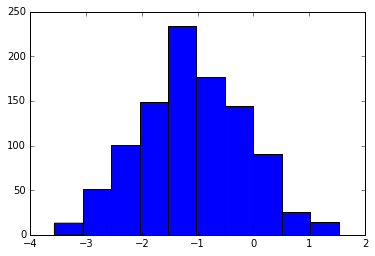

In [57]:
plt.show()

In [58]:
import tensorflow as tf

In [59]:
from tensorflow.contrib.distributions import Normal 

In [61]:
norm = Normal(0.,1.)

In [68]:
with tf.Session() as sess:
    print sess.run(tf.reduce_sum(norm.log_prob([0.2,0.1])))

-1.86288


In [1]:
import numpy as np

In [2]:
a = np.array([[1,2,3],[1,2,3],[1,2,3]])

In [3]:
b = np.array([[2,3,4],[2,4,5]])

In [5]:
np.dot(a,b.T)

array([[20, 25],
       [20, 25],
       [20, 25]])